<a href="https://colab.research.google.com/github/Alejandroe0/Computacional/blob/main/Precesion_de_mercurio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

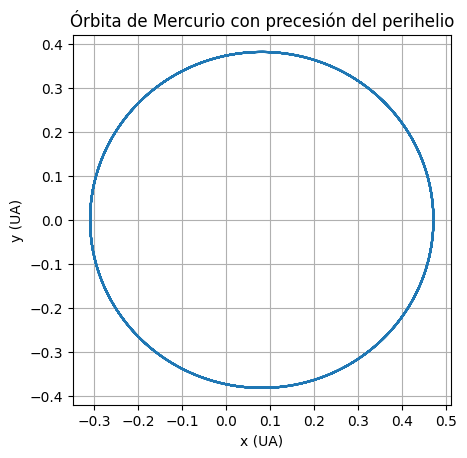

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
G = 4 * np.pi**2  # Constante gravitacional en UA^3/año^2
Ms = 1.0  # Masa del Sol en unidades solares
alpha = 1.1e-8  # Factor de corrección relativista
a = 0.39  # Semieje mayor de Mercurio en UA
e = 0.206  # Excentricidad de Mercurio
N = 20000  # Número de pasos
dt = 0.0001  # Paso temporal

# Condiciones iniciales
x0 = (1 + e) * a
y0 = 0
vx0 = 0
vy0 = np.sqrt(G * Ms / a * (1 - e) / (1 + e))

# Función de la aceleración
def acceleration(x, y, alpha):
    r = np.sqrt(x**2 + y**2)
    factor = G * Ms / r**3 * (1 + alpha / r**2)
    ax = -factor * x
    ay = -factor * y
    return ax, ay


# Método de Runge-Kutta de cuarto orden
def runge_kutta(x0, y0, vx0, vy0, N, dt, alpha):


    # En el trabajo vi que, a diferencia de mi tarea anterior, en lugar de acceder
    # a los ultimos valores de las listas de X y Y, puedo actualizar el valor en
    # memoria de X y Y realmente no he hecho pruebas de cual es más optimo
    # computacionalmente.
    x, y = x0, y0
    vx, vy = vx0, vy0
    x_vals, y_vals = [x], [y]



    for i in range(N):
        ax1, ay1 = acceleration(x, y, alpha)
        kx1 = vx * dt
        ky1 = vy * dt
        kvx1 = ax1 * dt
        kvy1 = ay1 * dt

        ax2, ay2 = acceleration(x + 0.5 * kx1, y + 0.5 * ky1, alpha)
        kx2 = (vx + 0.5 * kvx1) * dt
        ky2 = (vy + 0.5 * kvy1) * dt
        kvx2 = ax2 * dt
        kvy2 = ay2 * dt

        ax3, ay3 = acceleration(x + 0.5 * kx2, y + 0.5 * ky2, alpha)
        kx3 = (vx + 0.5 * kvx2) * dt
        ky3 = (vy + 0.5 * kvy2) * dt
        kvx3 = ax3 * dt
        kvy3 = ay3 * dt

        ax4, ay4 = acceleration(x + kx3, y + ky3, alpha)
        kx4 = (vx + kvx3) * dt
        ky4 = (vy + kvy3) * dt
        kvx4 = ax4 * dt
        kvy4 = ay4 * dt

        x += (kx1 + 2*kx2 + 2*kx3 + kx4) / 6
        y += (ky1 + 2*ky2 + 2*ky3 + ky4) / 6
        vx += (kvx1 + 2*kvx2 + 2*kvx3 + kvx4) / 6
        vy += (kvy1 + 2*kvy2 + 2*kvy3 + kvy4) / 6

        x_vals.append(x)
        y_vals.append(y)

    return np.array(x_vals), np.array(y_vals)

# Cálculo de la órbita
x_vals, y_vals = runge_kutta(x0, y0, vx0, vy0, N, dt, alpha)

# Graficar la órbita
plt.plot(x_vals, y_vals)
plt.xlabel("x (UA)")
plt.ylabel("y (UA)")
plt.title("Órbita de Mercurio con precesión del perihelio")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


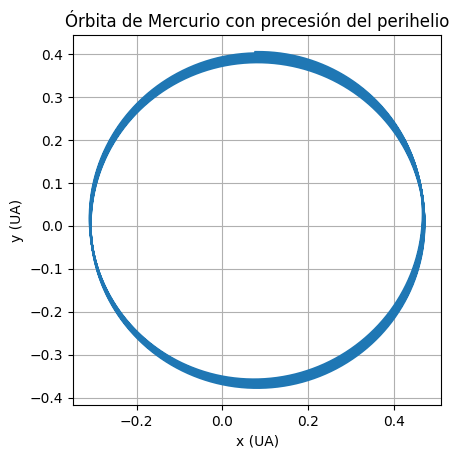

In [2]:
# Cálculo de la órbita alpha = 0.0008
x_vals, y_vals = runge_kutta(x0, y0, vx0, vy0, N, dt, 0.0008)

# Graficar la órbita
plt.plot(x_vals, y_vals)
plt.xlabel("x (UA)")
plt.ylabel("y (UA)")
plt.title("Órbita de Mercurio con precesión del perihelio")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Usamos el nuevo $α=0.0008$

# Acá solo se modifica para que el runge kutta devuelva los valores en coordenadas polares, así que solo se le agregan unas lineas de código para que devielva en cartesianas y polares. (No modifiqué el anterior para que quede constancia del avance lógico y secualencial que hacia en el desarrollo del proyecto) **Basicamente se puede ignorar la primer funcion de runge_kutta**

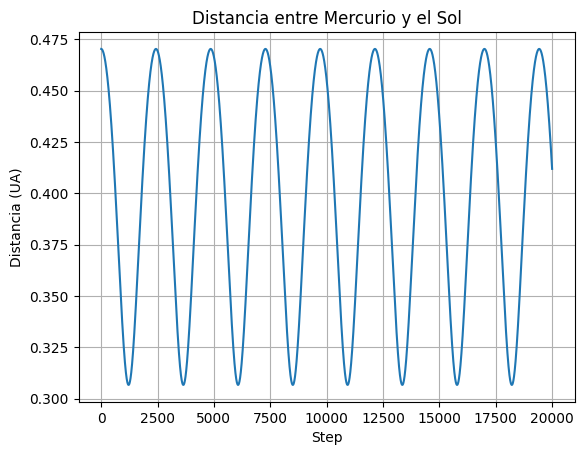

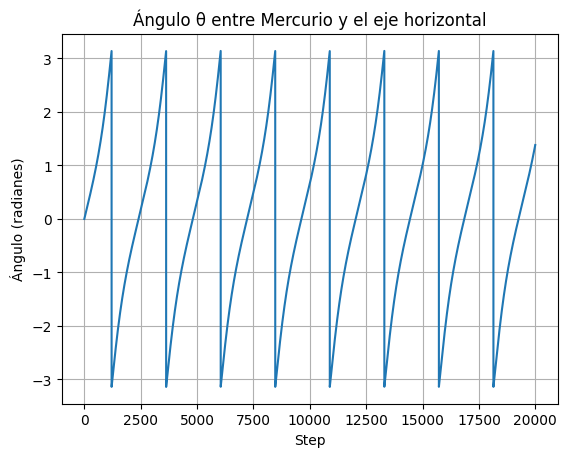

In [3]:

# Método de Runge-Kutta en polares
def runge_kutta(x0, y0, vx0, vy0, N, dt, alpha):
    x, y = x0, y0
    vx, vy = vx0, vy0
    r_vals, theta_vals = [], []

    for i in range(N):

        #convertir a polares y guardar distancia y ángulo
        r_vals.append(np.sqrt(x**2 + y**2))
        theta_vals.append(np.arctan2(y, x))

        #Esto no cambia

        ax1, ay1 = acceleration(x, y, alpha)
        kx1 = vx * dt
        ky1 = vy * dt
        kvx1 = ax1 * dt
        kvy1 = ay1 * dt

        ax2, ay2 = acceleration(x + 0.5 * kx1, y + 0.5 * ky1, alpha)
        kx2 = (vx + 0.5 * kvx1) * dt
        ky2 = (vy + 0.5 * kvy1) * dt
        kvx2 = ax2 * dt
        kvy2 = ay2 * dt

        ax3, ay3 = acceleration(x + 0.5 * kx2, y + 0.5 * ky2, alpha)
        kx3 = (vx + 0.5 * kvx2) * dt
        ky3 = (vy + 0.5 * kvy2) * dt
        kvx3 = ax3 * dt
        kvy3 = ay3 * dt

        ax4, ay4 = acceleration(x + kx3, y + ky3, alpha)
        kx4 = (vx + kvx3) * dt
        ky4 = (vy + kvy3) * dt
        kvx4 = ax4 * dt
        kvy4 = ay4 * dt

        x += (kx1 + 2*kx2 + 2*kx3 + kx4) / 6
        y += (ky1 + 2*ky2 + 2*ky3 + ky4) / 6
        vx += (kvx1 + 2*kvx2 + 2*kvx3 + kvx4) / 6
        vy += (kvy1 + 2*kvy2 + 2*kvy3 + kvy4) / 6

    return np.array(x_vals), np.array(y_vals), np.array(r_vals), np.array(theta_vals)

# Calcular órbita con el nuevo valor de alpha
x_vals_prueba, y_vals_prueba, r_vals, theta_vals = runge_kutta(x0, y0, vx0, vy0, N, dt, 0.0008)



# Graficar órbita
plt.plot(r_vals)
plt.xlabel("Step")
plt.ylabel("Distancia (UA)")
plt.title("Distancia entre Mercurio y el Sol")
plt.grid(True)
plt.show()

# Graficar ángulo en función del tiempo
plt.plot(theta_vals)
plt.xlabel("Step")
plt.ylabel("Ángulo (radianes)")
plt.title("Ángulo θ entre Mercurio y el eje horizontal")
plt.grid(True)
plt.show()




In [4]:
# Obtener los 8 valores más pequeños de theta_vals, que son los correspondientes al perhelio
menores_theta_vals = np.sort(theta_vals)[:8]
menores_theta_vals[0]

-3.141499911486674

# Esta seccion solo fue de pruebas que salieron mal, me ayudó Alexandra con con la lógica para que funcionara.

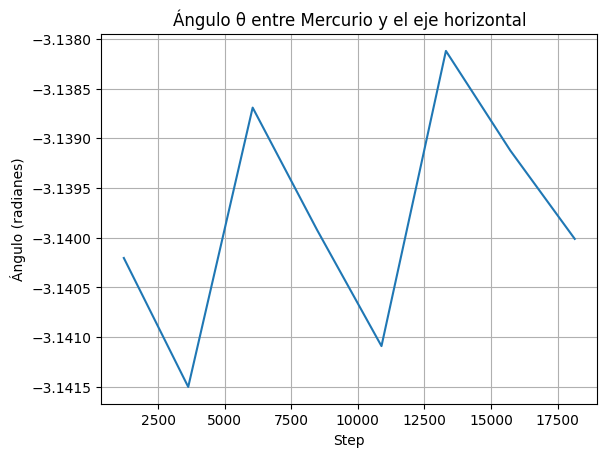

6.774422009991958e-08
-3.140488672720871


In [5]:
# #Buscar el indice del valor mas cercano a-3.14149991 en theta_vals
# index_of_value = np.argmin(np.abs(theta_vals - (-3.14149991)))

# #Imprimir el indice
# print(index_of_value)


#Luistas de los valores
valores_peri = []

#Almaceno los valores
for valor in menores_theta_vals:
    valores_peri.append([np.where(theta_vals == valor)[0][0],valor])

#ordenar segun el step
valores_peri.sort(key=lambda x: x[0])


#imprimir
x = [item[0] for item in valores_peri]
y = [item[1] for item in valores_peri]

plt.plot(x,y)
plt.xlabel("Step")
plt.ylabel("Ángulo (radianes)")
plt.title("Ángulo θ entre Mercurio y el eje horizontal")
plt.grid(True)
plt.show()


#Hago el ajuste y asigno los valores
m, b = np.polyfit(x,y,1)


print(m)
print(b)

# Acá fue donde Alexandra me ayudo con la lógica de la derivada.

<ipython-input-6-0a13aa9cc71c>:10: RuntimeWarning: invalid value encountered in sqrt
  r = np.sqrt(x*2 + y*2)


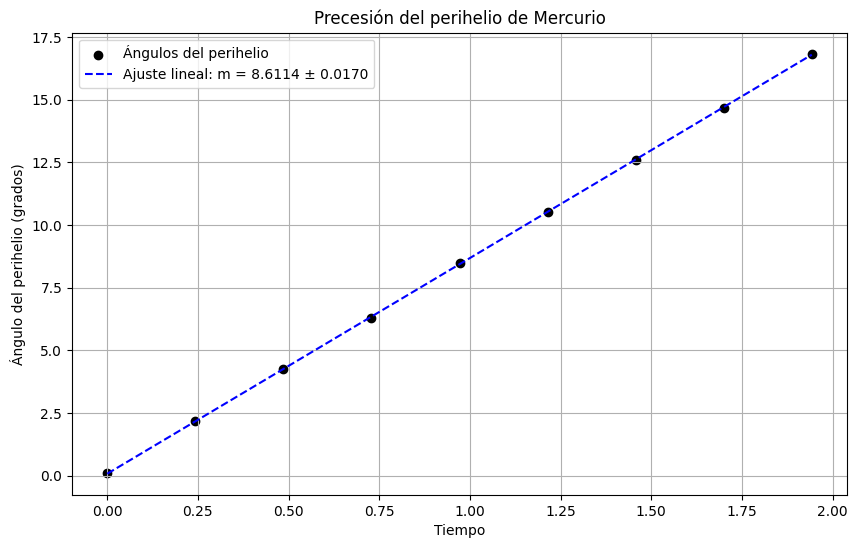

In [6]:
#Rungew Hutta tomando en cuenta la derivada.
def Runge_Kutta_derivada(x, vx, y, vy, dt, N, alpha):

    #Listas para almacenar valores
    distancia = [] #Distancia de Mercurio al Sol
    angulos = [] #Ángulos
    derivada = [] #Derivada

    for i in range(N):
        r = np.sqrt(x*2 + y*2)
        theta = np.arctan2(y, x)
        theta_degrees = np.degrees(theta)

        #Calculo de la derivada
        drdt = (x*vx + y*vy)/r

        #Almaceno los valores en las listas
        distancia.append(r)
        angulos.append(theta_degrees)
        derivada.append(drdt)

        #Esto es runge kutta de toda la vida
        ax = -G*Ms * x / r*3 * (1 + alpha / r*2)
        ay = -G*Ms * y / r*3 * (1 + alpha / r*2)

        ax1, ay1 = acceleration(x, y, alpha)
        k1_x = vx * dt
        k1_y = vy * dt
        k1_vx = ax1 * dt
        k1_vy = ay1 * dt

        ax2, ay2 = acceleration(x + 0.5 * k1_x, y + 0.5 * k1_y, alpha)
        k2_x = (vx + 0.5 * k1_vx) * dt
        k2_y = (vy + 0.5 * k1_vy) * dt
        k2_vx = ax2 * dt
        k2_vy = ay2 * dt

        ax3, ay3 = acceleration(x + 0.5 * k2_x, y + 0.5 * k2_y, alpha)
        k3_x = (vx + 0.5 * k2_vx) * dt
        k3_y = (vy + 0.5 * k2_vy) * dt
        k3_vx = ax3 * dt
        k3_vy = ay3 * dt

        ax4, ay4 = acceleration(x + k3_x, y + k3_y, alpha)
        k4_x = (vx + k3_vx) * dt
        k4_y = (vy + k3_vy) * dt
        k4_vx = ax4 * dt
        k4_vy = ay4 * dt

        x += (k1_x + 2 * k2_x + 2 * k3_x + k4_x) / 6
        y += (k1_y + 2 * k2_y + 2 * k3_y + k4_y) / 6
        vx += (k1_vx + 2 * k2_vx + 2 * k3_vx + k4_vx) / 6
        vy += (k1_vy + 2 * k2_vy + 2 * k3_vy + k4_vy) / 6

    return np.array(distancia), np.array(angulos), np.array(derivada)

#función para encontrar los puntos criticos en drdt los máximos y mínimos
def puntos_criticos(tiempo, drdt, angulos):

    #lista de los puntos de inflexion derivada.
    inflexion = []

    #lista de los angulos correspondientes al perihelio.
    angulos_perihelio = []

    #itero sobre todos los puntos
    for i in range(1, len(drdt)):

        #De calculo tomamos los criterios de concavidad
        if drdt[i-1] * drdt[i] <= 0:

            #accedop al último valor de la lista
            t = tiempo[i]

            #Solo hago que los angulos sean ciclicos con el módulo
            theta = angulos[i] % 360

            #El perihelio solo se da en estas condiciones
            if 0 <= theta <= 180:

                #agrego los datos
                inflexion.append(t)
                angulos_perihelio.append(theta)

    return np.array(inflexion), np.array(angulos_perihelio)

# Calculo de la órbita con el nuevo valor de alpha y las correciones para los angulos
distancia, angulos, drdt = Runge_Kutta_derivada(x0, vx0, y0, vy0, dt, N, 0.0008)

#convierto los steps en segundos
tiempo = np.arange(N) * dt

#Encontra calculo los datos del perihelio
tiempos_perihelio, angulos_perihelio = puntos_criticos(tiempo, drdt, angulos)

#Ajuste lineal con todos los datos de error
ajuste_lineal, error, _, _, _ = np.polyfit(tiempos_perihelio, angulos_perihelio, 1, full=True)
pendiente, intercepto = ajuste_lineal

#Calcular el error estándar de la pendiente
desviacion = np.sum((tiempos_perihelio - np.mean(tiempos_perihelio))**2)

#datos de error del ajuste lineal
error_pendiente = np.sqrt(error[0] / (len(tiempos_perihelio) - 2) / desviacion)

#Grafico
plt.figure(figsize=(10, 6))
plt.scatter(tiempos_perihelio, angulos_perihelio, color='black', label='Ángulos del perihelio')
plt.xlabel('Tiempo')
plt.ylabel('Ángulo del perihelio (grados)')
plt.title('Precesión del perihelio de Mercurio')
ajuste = pendiente * tiempos_perihelio + intercepto
plt.plot(tiempos_perihelio, ajuste, 'b--', label=f'Ajuste lineal: m = {pendiente:.4f} ± {error_pendiente:.4f}')
plt.legend()
plt.grid(True)
plt.show()


#Como si funciona, lo hago para los diferentes alpha. Asi que copio todo y lo hago una función.

Dejo el gráfico en la función solo para que se vean los ajustes, pero eso no es recomendable (Creo)

<ipython-input-6-0a13aa9cc71c>:10: RuntimeWarning: invalid value encountered in sqrt
  r = np.sqrt(x*2 + y*2)


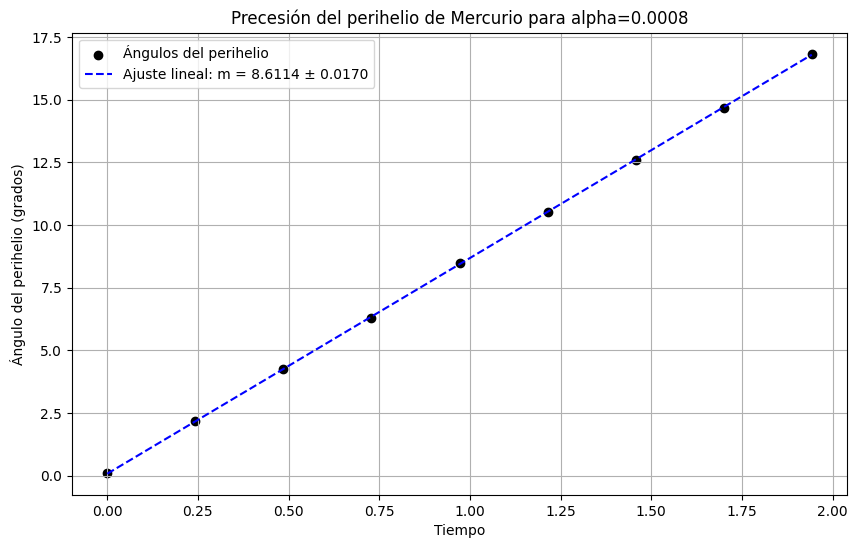

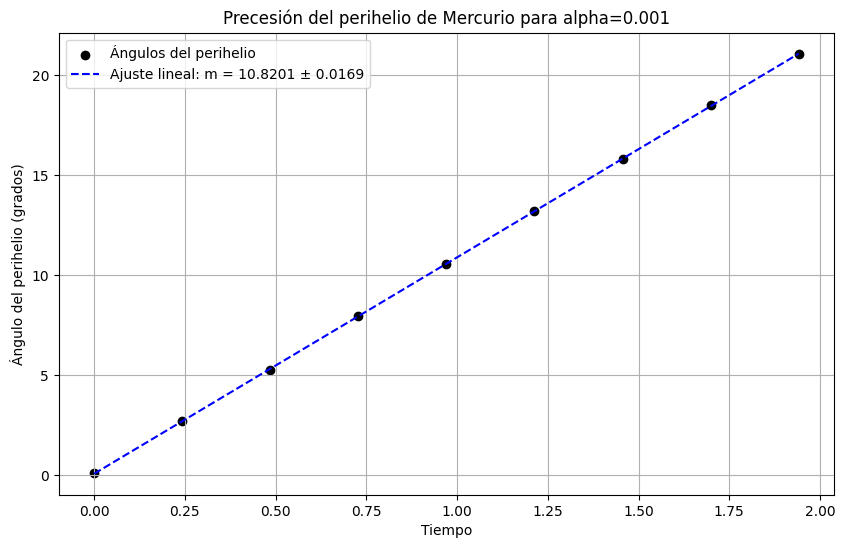

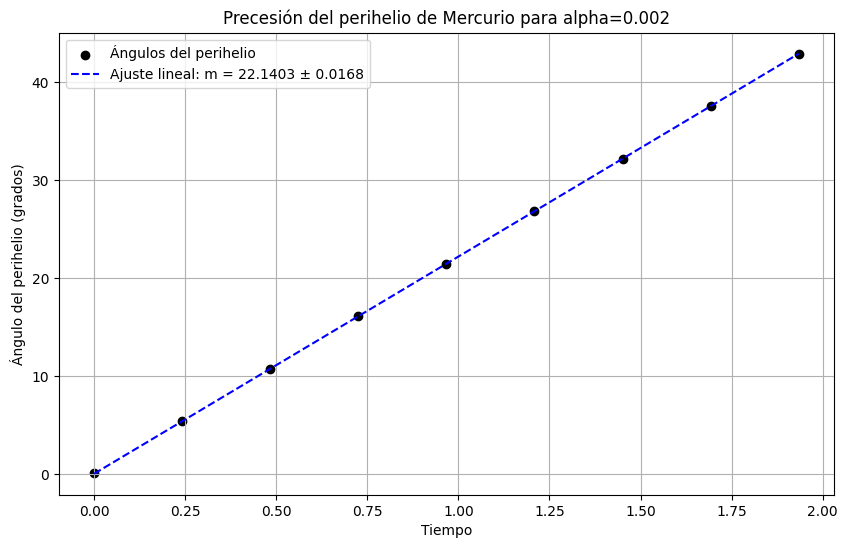

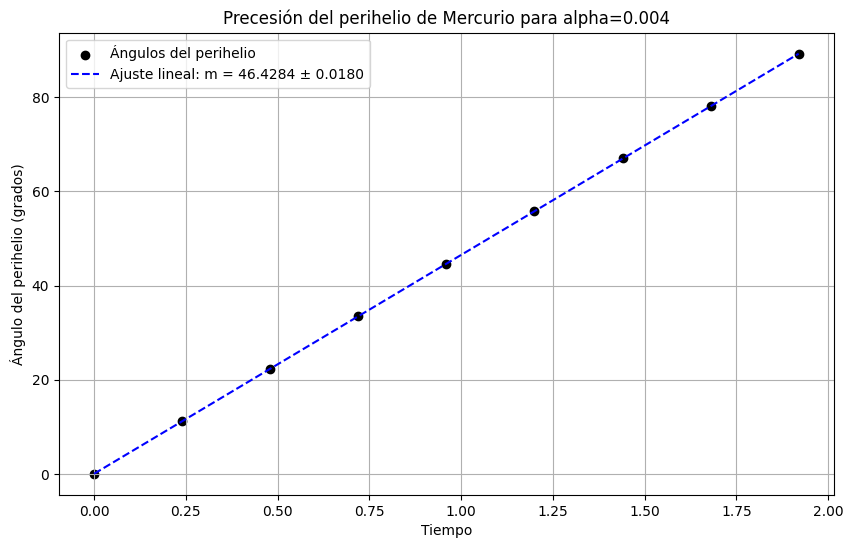

In [7]:
def dtheta_dt(x0, vx0, y0, vy0, dt, N, alpha):

  # Calculo de la órbita con el nuevo valor de alpha y las correciones para los angulos
  distancia, angulos, drdt = Runge_Kutta_derivada(x0, vx0, y0, vy0, dt, N, alpha)

  #convierto los steps en segundos
  tiempo = np.arange(N) * dt

  #Encontra calculo los datos del perihelio
  tiempos_perihelio, angulos_perihelio = puntos_criticos(tiempo, drdt, angulos)

  #Ajuste lineal con todos los datos de error
  ajuste_lineal, error, _, _, _ = np.polyfit(tiempos_perihelio, angulos_perihelio, 1, full=True)
  pendiente, intercepto = ajuste_lineal

  #Calcular el error estándar de la pendiente
  desviacion = np.sum((tiempos_perihelio - np.mean(tiempos_perihelio))**2)

  #datos de error del ajuste lineal
  error_pendiente = np.sqrt(error[0] / (len(tiempos_perihelio) - 2) / desviacion)

  #Grafico
  plt.figure(figsize=(10, 6))
  plt.scatter(tiempos_perihelio, angulos_perihelio, color='black', label='Ángulos del perihelio')
  plt.xlabel('Tiempo')
  plt.ylabel('Ángulo del perihelio (grados)')
  plt.title(f'Precesión del perihelio de Mercurio para alpha={alpha}')
  ajuste = pendiente * tiempos_perihelio + intercepto
  plt.plot(tiempos_perihelio, ajuste, 'b--', label=f'Ajuste lineal: m = {pendiente:.4f} ± {error_pendiente:.4f}')
  plt.legend()
  plt.grid(True)
  plt.show()

  return pendiente, error_pendiente


#agrego los datos de alpha a una lista
alphas = [0.0008, 0.001, 0.002, 0.004]

#lista para almacenar los resultados
datos = []
errores = []


#itero los alphas con la funcion creada
for ii in alphas:
  pendiente, error = dtheta_dt(x0, vx0, y0, vy0, dt, N, ii)
  print('\n')
  datos.append(pendiente)
  errores.append(error)



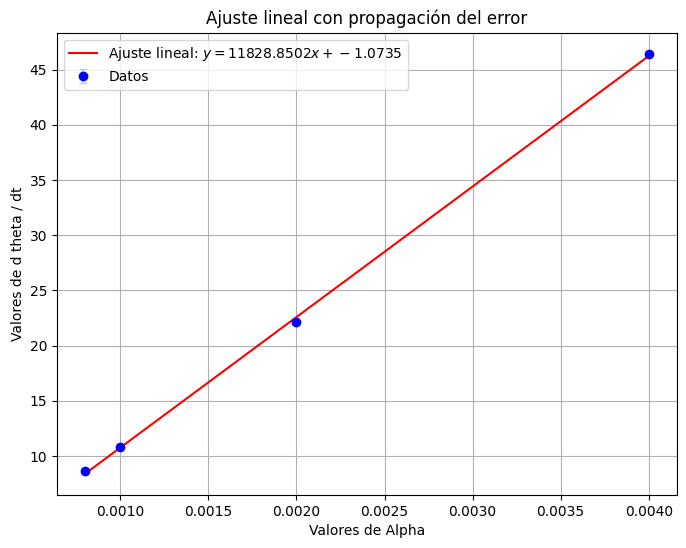

Pendiente del ajuste: 11828.8502 ± 154.7863
Valor estimado de a: -1.0733


In [8]:
# Datos
x = np.array(alphas)
y = np.array(datos)
y_err = np.array(errores)

# Ajuste lineal con pesos
# pesos inversamente proporcionales a los errores
weights = 1 / y_err
fit_params, cov_matrix = np.polyfit(x, y, 1, w=weights, cov=True)

# Extraemos la pendiente, intersección y sus errores
pendiente_alpha, intercepto_alpha = fit_params
pendiente_alpha_err, intercepto_alpha_err = np.sqrt(np.diag(cov_matrix))

# Valores ajustados para la gráfica
x_fit = np.linspace(min(x), max(x), 100)
y_fit = pendiente_alpha * x_fit + intercepto_alpha

# Gráfica
plt.figure(figsize=(8, 6))
plt.errorbar(x, y, yerr=y_err, fmt='o', label='Datos', color='blue', ecolor='lightblue', capsize=3)
plt.plot(x_fit, y_fit, label=f'Ajuste lineal: $y = {pendiente_alpha:.4f}x + {intercepto_alpha:.4f}$', color='red')
plt.xlabel('Valores de Alpha')
plt.ylabel('Valores de d theta / dt')
plt.title('Ajuste lineal con propagación del error')
plt.legend()
plt.grid(True)
plt.show()

print(f"Pendiente del ajuste: {pendiente_alpha:.4f} ± {pendiente_alpha_err:.4f}")

valor_estimado_de_a = pendiente_alpha * 0.000000011 + intercepto_alpha
print(f"Valor estimado de a: {valor_estimado_de_a:.4f}")
